# Minimal example with TensorFlow 2.0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data generation

In [3]:
observations = 1000

xs = np.random.uniform(low=-10,high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

# np.savez(file name, arrays) - saves n-dimensional arrays in .npz format,
# using a certain keyword(label) for each array
np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

## Solving with TensorFlow

In [4]:
training_data = np.load('TF_intro.npz')

In [19]:
input_size = 2 # xs and zs
output_size = 1 # y

# tf.keras.Sequential() - function that specifies how the model will be laid down('stacks layers')
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 ) 
                            ])
# tf.keras.Dense(output size) - takes the inputs provided to the model and calculates the 
    # dot product of the inputs and the weights and adds the bias.
    # = In numpy, output = np.dot(inputs,weights)+bias
# tf.keras.Dense(output size, kernel_initializer, bias_initializer) - function that is
    # laying down the model and initialize weights


# tf.keras.optimizers.SGD(learning_rate) - Stochastic Gradient Descent optimizers,
    # including support for learning rate, momentum, decay, etc.
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


# model.compile(optimizer,loss) - configures the model for training
model.compile(custom_optimizer, loss='mean_squared_error')
# loss = L2-norm loss, scaled by the # of observations (mean least sum of squared error)


# model.fit(inputs, targets) - fits(trains) the model
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose=2)
# Epoch = iteration over the full dataset
# verbose = 0 stands for no output about the training is displayed
# verbose = 1, 'progress bar'
# verbose = 2, 'one line per epoch'

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 21.4335
Epoch 2/100
1000/1000 - 0s - loss: 1.2494
Epoch 3/100
1000/1000 - 0s - loss: 0.4278
Epoch 4/100
1000/1000 - 0s - loss: 0.3790
Epoch 5/100
1000/1000 - 0s - loss: 0.3602
Epoch 6/100
1000/1000 - 0s - loss: 0.3512
Epoch 7/100
1000/1000 - 0s - loss: 0.3535
Epoch 8/100
1000/1000 - 0s - loss: 0.3404
Epoch 9/100
1000/1000 - 0s - loss: 0.3487
Epoch 10/100
1000/1000 - 0s - loss: 0.3481
Epoch 11/100
1000/1000 - 0s - loss: 0.4072
Epoch 12/100
1000/1000 - 0s - loss: 0.3444
Epoch 13/100
1000/1000 - 0s - loss: 0.3441
Epoch 14/100
1000/1000 - 0s - loss: 0.3637
Epoch 15/100
1000/1000 - 0s - loss: 0.4019
Epoch 16/100
1000/1000 - 0s - loss: 0.3847
Epoch 17/100
1000/1000 - 0s - loss: 0.3522
Epoch 18/100
1000/1000 - 0s - loss: 0.3877
Epoch 19/100
1000/1000 - 0s - loss: 0.3730
Epoch 20/100
1000/1000 - 0s - loss: 0.3572
Epoch 21/100
1000/1000 - 0s - loss: 0.4034
Epoch 22/100
1000/1000 - 0s - loss: 0.3592
Epoch 23/100
1000/1000 - 0s - loss: 0.37

loss is decreasing, so our algorithm has worked

## Extract the weights and bias

We should get 2, -3, 5

In [20]:
model.layers[0].get_weights()

[array([[ 1.9822913],
        [-2.9779372]], dtype=float32), array([4.9861403], dtype=float32)]

In [21]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9822913],
       [-2.9779372]], dtype=float32)

In [22]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9861403], dtype=float32)

## Extract the outputs (make predictions)

In [23]:
# model.predict_on_batch(data) - calculates the outputs given inputs
model.predict_on_batch(training_data['inputs']).numpy()[:20,:] # first 20 rows

array([[ 13.330754  ],
       [ 27.10336   ],
       [  1.1227834 ],
       [ -0.41359425],
       [ 29.748173  ],
       [ 28.982204  ],
       [ 40.155872  ],
       [  3.5817828 ],
       [ 39.371136  ],
       [ 11.29165   ],
       [ 11.426193  ],
       [-19.723343  ],
       [-17.530514  ],
       [ 38.38549   ],
       [ 31.78178   ],
       [ -4.635641  ],
       [  2.401556  ],
       [-43.505226  ],
       [ -5.471549  ],
       [ 19.045998  ]], dtype=float32)

#### There are the values that were compared to the targets to evaluate the loss function

In [24]:
training_data['targets'].round(1)[:20,:]

array([[ 13.6],
       [ 28.2],
       [  2. ],
       [  0.2],
       [ 29.8],
       [ 29.3],
       [ 41. ],
       [  3.1],
       [ 40.5],
       [ 11.5],
       [ 12.2],
       [-19.1],
       [-17.6],
       [ 39.4],
       [ 31.6],
       [ -3.8],
       [  2.1],
       [-44.4],
       [ -6.3],
       [ 18.5]])

### Compare the two arrays
They are close to each other

## Plotting the data

The line should be as close to 45 degrees as possible

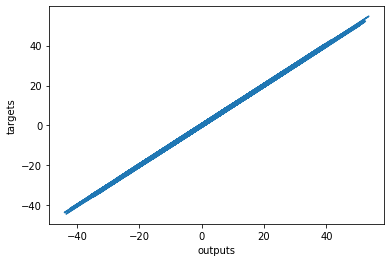

In [25]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),
        np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()